<!--# STAT 207: Data Science Exploration-->
# <u>Case Study 7</u>: Introduction to Inference – The Central Limit Theorem and Confidence Intervals for µ and p

This Case Study contains analyses to answer two questions from Pew Survey data:
- What is a plausible range of values for the average age of ALL adults living in the U.S.?
- What is a plausible range of values for the proportion of ALL adults living in the U.S. that are satisfied with the way things are going in the country at the time of the survey (2017)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Confidence Interval for a Population Mean $\mu$

**What is a plausible range of values for the average age of ALL adults living in the U.S.?**

For example, suppose we wanted to calculate a 95% confidence interval (ie. range of plausible values) for μ (the average age of ALL adults living in the U.S.). We have a random sample of size n=1489 that has a mean age of 50.49 years and a standard deviation of 17.84 years. **Suppose we also know that the standard deviation of ALL adults living in the U.S. is σ=18.**

### Dataset Cleaning and Inspection
The February 2017 Pew Research Center random phone number dialing survey had 1,503 respondents in total.

First, let's learn a little more about this dataset.

In [2]:
# Read in the data
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df_pew = pd.read_csv('Feb17public.csv', 
                   na_values=missing_values)
df_pew.head()

,psraid,sample,int_date,fcall,version,attempts,refusal,ilang,cregion,state,...,ql1a,qc1,money2,money3,iphoneuse,hphoneuse,ll,cp,cellweight,weight
0,100008,Landline,21017,170207,Client changes,4,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.733333
1,100019,Landline,21217,170207,Client changes,4,Yes,English,South,North Carolina,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.500000
2,100020,Landline,21217,170207,Client changes,4,Yes,English,Northeast,New York,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.533333
3,100021,Landline,20717,170207,Initial version,1,No,English,Midwest,Minnesota,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,5.866667
4,100024,Landline,20717,170207,Initial version,1,No,English,Midwest,Illinois,...,NaN,NaN,NaN,NaN,Dual,Dual HH,1,1,NaN,1.700000


What is the shape of the dataset?

In [3]:
df_pew.shape

(1503, 130)

What columns are contained in this dataset?

In [4]:
df_pew.columns

Index(['psraid', 'sample', 'int_date', 'fcall', 'version', 'attempts',
       'refusal', 'ilang', 'cregion', 'state',
       ...
       'ql1a', 'qc1', 'money2', 'money3', 'iphoneuse', 'hphoneuse', 'll', 'cp',
       'cellweight', 'weight'],
      dtype='object', length=130)

We can't see every variable of the data from this output.  Let's use a for-loop so we can inspect all 130 column names.

In [5]:
for col in df_pew.columns:
    print(col)

psraid
sample
int_date
fcall
version
attempts
refusal
ilang
cregion
state
density
sstate
form
stimes
igender
irace
llitext0
susr
usr
scregion
qs1
q1
q1a
q2
q5af1
q5bf1
q5cf1
q5df1
q6af2
q6bf2
q6cf2
q6df2
q10a
q10b
q15af1
q15b
q15cf2
q15df1
q15ef1
q15ff1
q15gf2
q15hf2
q15if2
q16
q19
q35
q36
q37
q39
q43
q44
q45
q45vb
Q45VB0
Q45VB1
Q45VB2
q45oem1
q45oem2
q45oem3
q52
q53
q54
q55
q61a
q61b
q61c
q61d
q61e
q62f1
q63f1
q64f2
q65
q66
q68f1
q69f2
q70f1
q71f2
q74
q75
q81
q82
q84a
q84bf1
q84cf1
q84df1
q84ef2
q84ff2
q84gf2
q88
q90f1
q91f2
sex
age
gen5
educ2
hisp
adults
racethn
racethn2
birth_hisp
citizen
child
relig
chr
born
attend
q92
q92a
income
reg
party
partyln
partysum
partyideo
q93
q94
ideo
hh1
hh3
ql1
ql1a
qc1
money2
money3
iphoneuse
hphoneuse
ll
cp
cellweight
weight


How many missing values are in each column?

In [6]:
df_pew.isna().sum()

psraid          0
sample          0
int_date        0
fcall           0
version         0
             ... 
hphoneuse       0
ll              0
cp              0
cellweight    377
weight          0
Length: 130, dtype: int64

How many missing values are in the 'age' column?

In [7]:
df_pew.isna().sum().loc['age']

14

Let's create a pandas series that is just the the age column of this dataframe and drop the missing values from this series.

In [8]:
df_pew_age=df_pew['age'].dropna()
df_pew_age

0       80.0
1       70.0
2       69.0
3       50.0
4       70.0
        ... 
1498    37.0
1499    30.0
1500    72.0
1501    67.0
1502    35.0
Name: age, Length: 1489, dtype: float64

The code below confirms that we dropped 14 (=1503-1489) entries from this series that had missing values.

In [9]:
df_pew_age.shape

(1489,)

### Collecting Sample Information

If we consider our **population** to be <u>ALL adults living in the U.S.</u> then we can think of this Pew dataset as a **random sample** of size $n=1489$ from this population. Because the sample is **random** we can use this dataset to **make inferences** about our population. 

In [10]:
# compute and display sample statistics
sample_mean_age = df_pew_age.mean()
sample_std_age = df_pew_age.std()
n_age = df_pew_age.shape[0]
print('sample mean age=', round(sample_mean_age, 2), 
      '\nsample std age=', round(sample_std_age,2), 
      '\nsample size n=', n_age)

pop_std_age=18

print('popuolation standard deviation age=',pop_std_age) 

sample mean age= 50.49 
sample std age= 17.84 
sample size n= 1489
popuolation standard deviation age= 18


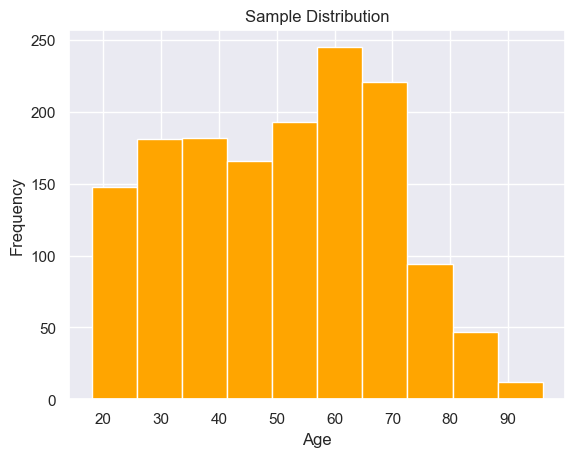

In [11]:
df_pew_age.hist(color='orange')
plt.title('Sample Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Are we allowed to calculate a confidence interval for $\mu$ using this sample that was collected and the equations we just learned? Why or why not?

Yes, the Central Limit Theorem Conditions (for Sample Means) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.
   
   
2. <u>Condition: At least one of: n>30 OR the population distribution is normal.</u>.
    - It looks like the population distribution of ages is NOT normal. How do we know?
        - The sample distribution and the population distribution tend to mirror each other.
        - The sample distribution above is NOT symmetric and unimodal, therefore, it is not a good assumption to say that it is normal.
    - However, because our sample size $n=1489>30$,this condition is met.


### What if one of the conditions above was not met and we calculated our confidence interval anyway using the given equations? 

Then our interpretations about the confidence interval may not be valid. For instance, we are calculating a 95% confidence interval. However, if our assumptions are not met, it may (for instance) be the case that we are only 90% confident that our population mean is in the range we produced.

### What is the critical value for this 95% confidence interval

<u>Goal:</u> Find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.95 is in between $-z^*$ and $z^*$.

<u>Put another way:</u> We want to find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.975=0.025+0.95 is to the left of $z^*$ and 
* an area of 0.025 is to the right of $z^*$. 

We can find the x-axis value (ie. the z-score) that has a left tail area of 0.975 by using the **norm.ppf()** function.

In [17]:
from scipy.stats import norm
critical_value=norm.ppf(0.975)
critical_value

1.959963984540054

The us the **critical value** for this 95% confidence interval is **$z^*=1.96$**.

### Calculate the 95% confidence interval.

Thus, using our confidence interval equation we get:

$(\bar{x} - z^*\frac{\sigma}{\sqrt{n}},\bar{x} + z^*\frac{\sigma}{\sqrt{n}})$

$(50.49 - (1.96)\frac{18}{\sqrt{1489}},50.49  + (1.96)\frac{18}{\sqrt{1489}})$

$(49.57,51.40)$.

In [18]:
lower_bound=sample_mean_age-critical_value*(pop_std_age/np.sqrt(n_age))
upper_bound=sample_mean_age+critical_value*(pop_std_age/np.sqrt(n_age))

print(lower_bound,',',upper_bound)

49.57397971873396 , 51.40251457273683


### Interpret this 95% confidence interval.

We are 95% confident that the average age of all adults living in the U.S. (i.e. $\mu$) is between 49.57 and 51.40.

## What to do with you don't know $\sigma$?

For example, suppose we wanted to calculate a 95% confidence interval (i.e. range of plausible values) for μ (the average age of ALL adults living in the U.S.). We have a random sample of size n=1503 that has a mean age of 50.49 years and a standard deviation of 17.84 years. Suppose we didn’t know what the population standard deviation was.


Because $n>30$ (for now) we can plug in $s$ for $\sigma$ and still get a relatively valid confidence interval:

$(\bar{x} - z^*\frac{\sigma}{\sqrt{n}},\bar{x} + z^*\frac{\sigma}{\sqrt{n}})$

$(\bar{x} - z^*\frac{s}{\sqrt{n}},\bar{x} + z^*\frac{s}{\sqrt{n}})$

$(50.49 - (1.96)\frac{17.84}{\sqrt{1489}},50.49  + (1.96)\frac{17.84}{\sqrt{1489}})$

$(49.58,51.39)$.

In [19]:
lower_bound=sample_mean_age-critical_value*(sample_std_age/np.sqrt(n_age))
upper_bound=sample_mean_age+critical_value*(sample_std_age/np.sqrt(n_age))

print(lower_bound,',',upper_bound)

49.581904861535484 , 51.3945894299353


We are 95% confident that the average age of all adults living in the U.S. (i.e. $\mu$) is between 49.58 and 51.39.

### What does "95% confident" mean?

If we repeated this process many times, generating repeated random samples of the same size and computing a confidence interval for each random sample, we would expect 95% of the resulting intervals to contain the true population mean age of all adults living in the U.S.

## Confidence Interval for a Population Proportion *p*

**What is a plausible range of values for the proportion of ALL adults living in the U.S. that are satisfied with the way things are going in the coutnry at the time of the survey (2017)?**

For example, suppose we wanted to calculate a 99% confidence interval (ie. range of plausible values) for p, the proportion of all adults living in the U.S. that are satisfied with the way things are going in the country at the time of the survey (2017). We collect a sample of size n=1503 that has a sample proportion of __________.

### Dataset Cleaning and Inspection
We wil be using the same 2017 Pew dataset as in the previous case study. The 'q2' column contains responses to the following question: 'All in all, are you satisfied or dissatisfied with the way things are going in this country today?'

Let's create a pandas series that is just the the q2 column of this dataframe and drop the missing values from this series.

In [20]:
df_pew_q2=df_pew['q2'].dropna()
df_pew_q2

0       Dissatisfied
1       Dissatisfied
2       Dissatisfied
3          Satisfied
4       Dissatisfied
            ...     
1498       Satisfied
1499    Dissatisfied
1500    Dissatisfied
1501    Dissatisfied
1502       Satisfied
Name: q2, Length: 1435, dtype: object

It looks like we ended up dropping 68 = (1503 - 1435) entries in this column with missing values.

In [21]:
df_pew_q2.shape

(1435,)

### Collect information from the problem.

How many of each type of response is there in this column?

In [22]:
q2sum=df_pew_q2.value_counts()
q2sum

Dissatisfied    1003
Satisfied        432
Name: q2, dtype: int64

Now we can compute the sample proportion that are satisfied as $\hat{p}=0.301$.

In [23]:
prop = q2sum['Satisfied']/q2sum.sum()
round(prop, 4)

0.301

Sample size n=1435

In [25]:
n_prop=df_pew_q2.shape[0]
n_prop

1435

### Are we allowed to calculate a confidence interval for p using this sample that was collected and the equations we just learned? Why or why not?

Yes, the Central Limit Theorem Conditions (for Sample Proportions) below are met by this sample.

1. <u>Condition: The observations are independent</u>.
    - Because the sample is collected via random sampling and $n<10\%$ of the population of ALL adults living in the U.S.


2. <u>Condition: $np\geq 10$ and $n(1-p)\geq 10$.</u>.
    - Because we don't know $p$, we plug in $\hat{p}=0.301$ in for $p$ in the conditions above.
    - $n\hat{p} = 1435\cdot 0.301\geq 10$
    - $n(1-\hat{p})=1435\cdot(1-0.301)\geq 10$.

In [26]:
n_prop*prop

432.0

In [27]:
n_prop*(1-prop)

1003.0

### What is the critical value for this 99% confidence interval?

<u>Goal:</u> Find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.99 is in between $-z^*$ and $z^*$.

<u>Put another way:</u> We want to find the POSITIVE z-score $z^*$ in the standard normal distribution in which:
* an area of 0.995=0.001+0.99 is to the left of $z^*$ and 
* an area of 0.001 is to the right of $z^*$. 


We can find the x-axis value (ie. the z-score) that has a left tail area of 0.995 by using the **norm.ppf()** function.

In [28]:
from scipy.stats import norm
critical_value=norm.ppf(0.995)
critical_value

2.5758293035489004

The critical value for this 99% confidence interval is $z^*=2.576$.

### Calculate the 99% confidence interval.

$(\hat{p} - z^*\sqrt{\frac{p(1-p)}{n}},\hat{p} - z^*\sqrt{\frac{p(1-p)}{n}})$

$(\hat{p} - z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}},\hat{p} - z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}})$

$(0.301 - 2.576\sqrt{\frac{0.301}{(1-0.301)}{1435}},0.301 + 2.576\sqrt{\frac{0.301}{(1-0.301)}{1435}})$

$(0.27,0.33)$.

In [29]:
lower_bound=prop-critical_value*np.sqrt(prop*(1-prop)/n_prop)
upper_bound=prop+critical_value*np.sqrt(prop*(1-prop)/n_prop)

print(lower_bound,',',upper_bound)

0.26985413319300744 , 0.33223645914148736


### Interpret this 99% confidence interval.

We are 99% confident that the proportion of ALL adults living in the U.S. that approve of the way things are going in the country (in 2017) is between 0.27 and 0.33.

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign